#### Problem Statement

- The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. 
- The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
- Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
- The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

#### Hypothesis Generation


- Understanding the data - Explore the dataset to comprehend its features, such as item weight, item fat content, item visibility etc.,
- Identifying potential factors - look for the potential factors influencing sales and the products.
- Formulating Hypotheses - Create a Hypothese based on the relationships of the variables.
- Problem - Its a Regression Problem, beacuse its a continuous data.
- Perform the Data Analysis to know which product is giving the highest sales.

Item Fat Content:-
- Whether it is a Regular or low fat 

Item Type:-
- whether this items belong to softdrinks, meat, fruits and vegetables , household, snack foods, health and hygiene etc.,

Outlet_Establishment_Year :-
- The establishing year is from the 1985 to 2009 with unique years of establishment.

Oulet_size :-
- what is the size of the product whether it is a small, medium and large

Location type:- 
- Whether the location of the store might be the Tier1, Tier 2, Tier 3

Store Type:-
- whether the store is a supermarket type1, supermarket type2, supermarket type3 or Grocery store.

#### Loading Packages and Data

In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
Bm_data = pd.read_csv('Train.csv')
Bm_data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [353]:
Bm_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

##### Here all are some unique elements in the variables

In [354]:
Bm_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [355]:
Bm_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [356]:
Bm_data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [357]:
Bm_data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [358]:
Bm_data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [359]:
Bm_data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [360]:
Bm_data['Item_Weight'] = pd.to_numeric(Bm_data['Item_Weight'],errors = 'coerce')

####  Data Structure and Content

In [361]:
# Reanaming the columns
Bm_data.rename(columns = {'Item_Identifier':'Item_Id','Item_MRP':'Price','Outlet_Identifier':'Store_Id','Outlet_Establishment_Year':'Store_Est_Year','Outlet_Size':'Store_Size','Outlet_Location_Type':'Store_Loc_Type','Outlet_Type':'Store_Type','Item_Outlet_Sales':'Sales'},inplace = True)

In [362]:
Bm_data.head(2)

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Price,Store_Id,Store_Est_Year,Store_Size,Store_Loc_Type,Store_Type,Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [363]:
Bm_data['Store_Est_Year'] = pd.to_datetime(Bm_data['Store_Est_Year'],format='%Y').dt.year

In [364]:
Bm_data.dtypes

Item_Id              object
Item_Weight         float64
Item_Fat_Content     object
Item_Visibility     float64
Item_Type            object
Price               float64
Store_Id             object
Store_Est_Year        int64
Store_Size           object
Store_Loc_Type       object
Store_Type           object
Sales               float64
dtype: object

In [365]:
Bm_data.shape

(8523, 12)

#Reading the test data 

In [366]:
Bm_test_data = pd.read_csv('Test.csv')
Bm_test_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [367]:
# Reanaming the columns
Bm_test_data.rename(columns = {'Item_Identifier':'Item_Id','Item_MRP':'Price','Outlet_Identifier':'Store_Id','Outlet_Establishment_Year':'Store_Est_Year','Outlet_Size':'Store_Size','Outlet_Location_Type':'Store_Loc_Type','Outlet_Type':'Store_Type'},inplace = True)

#### Exploratory Data Analysis(EDA)

<function matplotlib.pyplot.show(close=None, block=None)>

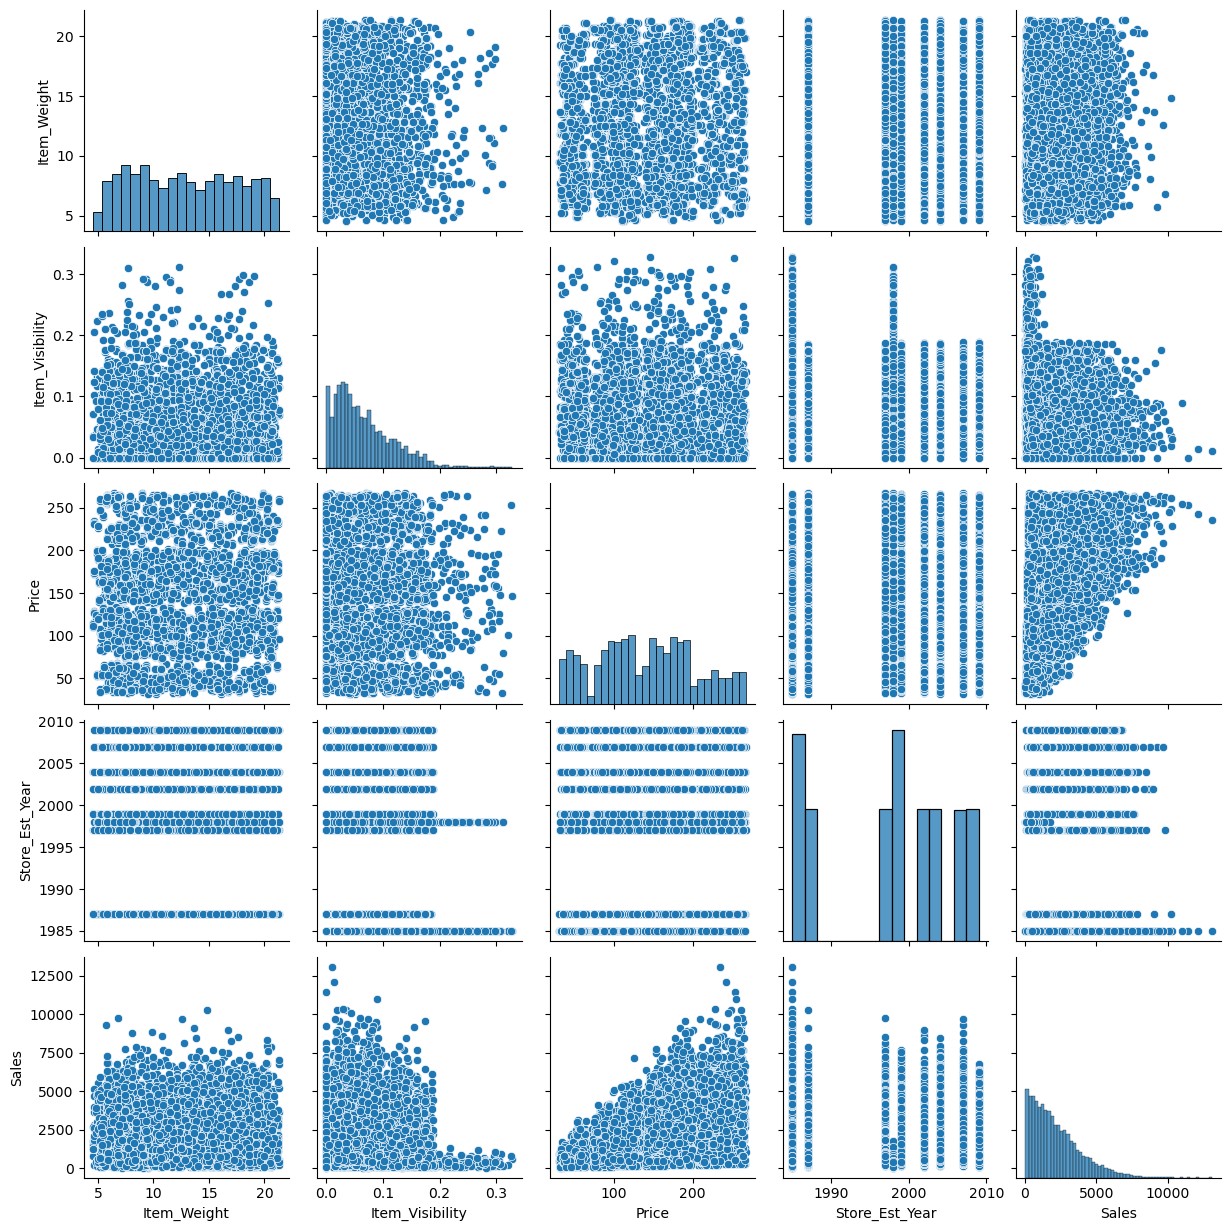

In [368]:
sns.pairplot(data = Bm_data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

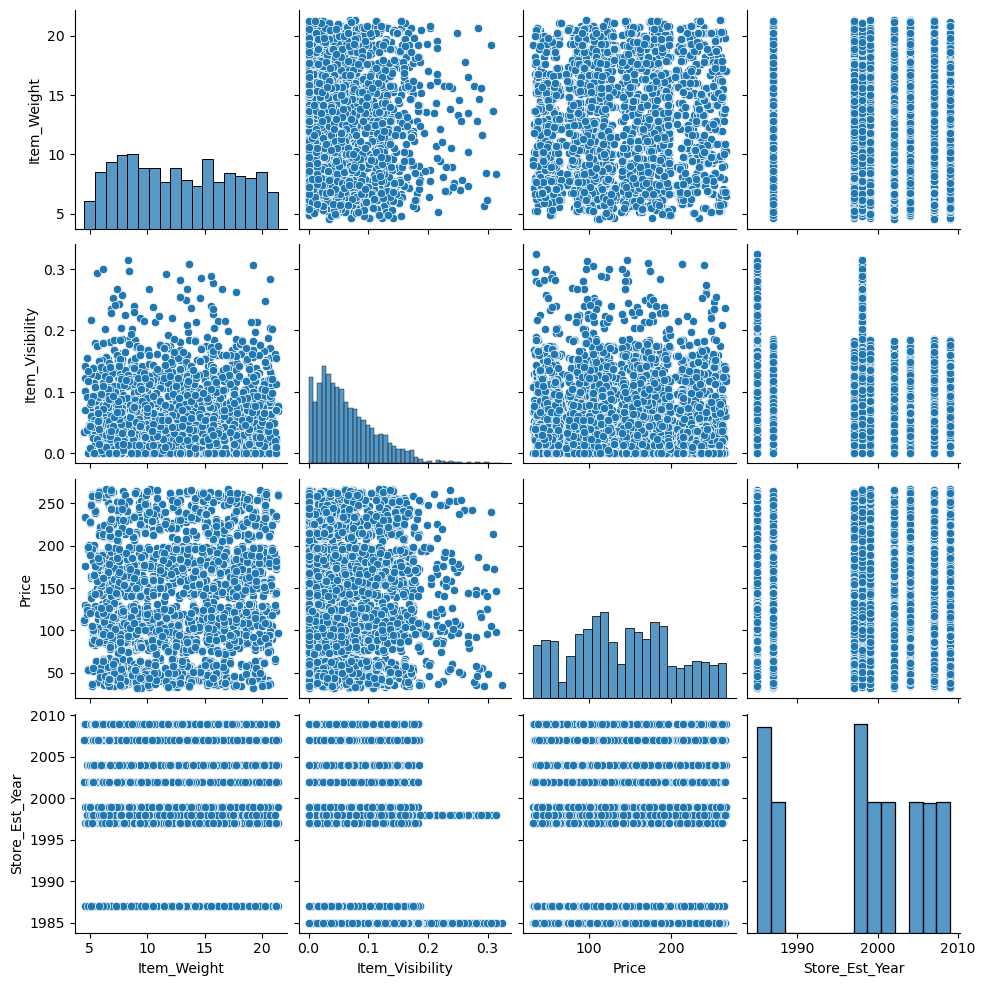

In [369]:
sns.pairplot(data = Bm_test_data)
plt.show

In these two pairplots I can find that, there are few ouliers in the Item visibility, Item_weight and price columns in the train data set but i cannot see any outliers in the test data set so better remove the outliers from the train data set.


In [370]:
# Removing of ouliers
Q1 = Bm_data['Item_Weight'].quantile(0.25)
Q3 = Bm_data['Item_Weight'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
# creating a outlier mask
outliers_mask = (Bm_data['Item_Weight'] < lower ) | (Bm_data['Item_Weight'] > upper)
# Removing the ouliers from the column
without_outliers = Bm_data[~outliers_mask]
#update the original datafrae to the data without outliers
Bm_data['Item_Weight']= without_outliers['Item_Weight']

In [371]:
Q1 = Bm_data['Price'].quantile(0.25)
Q3 = Bm_data['Price'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
# creating a outlier mask
outliers_mask = (Bm_data['Price'] < lower ) | (Bm_data['Price'] > upper)
# Removing the ouliers from the column
without_outliers = Bm_data[~outliers_mask]
#update the original datafrae to the data without outliers
Bm_data['Price']= without_outliers['Price']

In [372]:
Q1 = Bm_data['Item_Visibility'].quantile(0.25)
Q3 = Bm_data['Item_Visibility'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
# creating a outlier mask
outliers_mask = (Bm_data['Item_Visibility'] < lower ) | (Bm_data['Item_Visibility'] > upper)
# Removing the ouliers from the column
without_outliers = Bm_data[~outliers_mask]
#update the original datafrae to the data without outliers
Bm_data['Item_Visibility']= without_outliers['Item_Visibility']

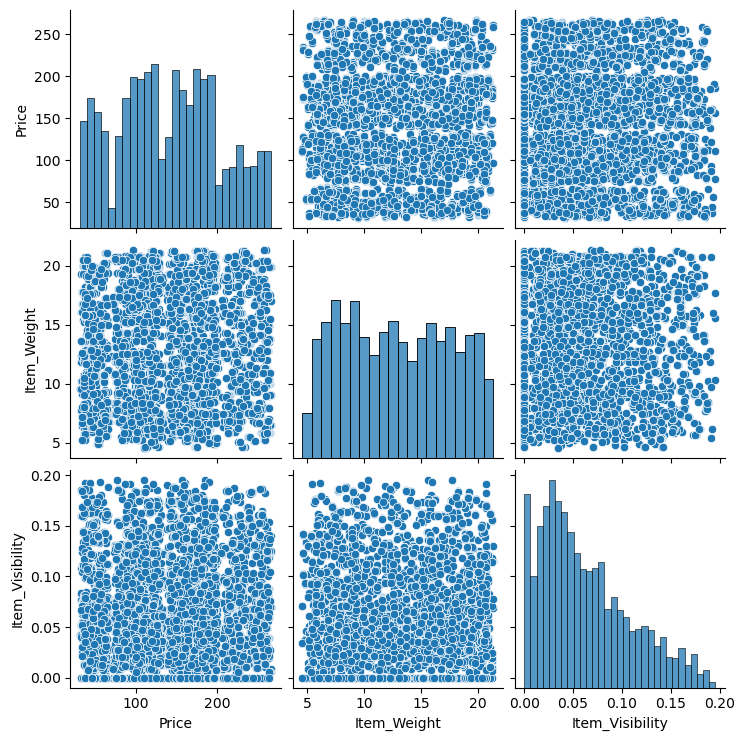

In [373]:
sns.pairplot(Bm_data[['Price','Item_Weight','Item_Visibility']])

This is how we can remove the ouliers from the respective columns which are having outliers and also can be seen visually

In [374]:
Bm_data.head(1)

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Price,Store_Id,Store_Est_Year,Store_Size,Store_Loc_Type,Store_Type,Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


# Univariate Analysis

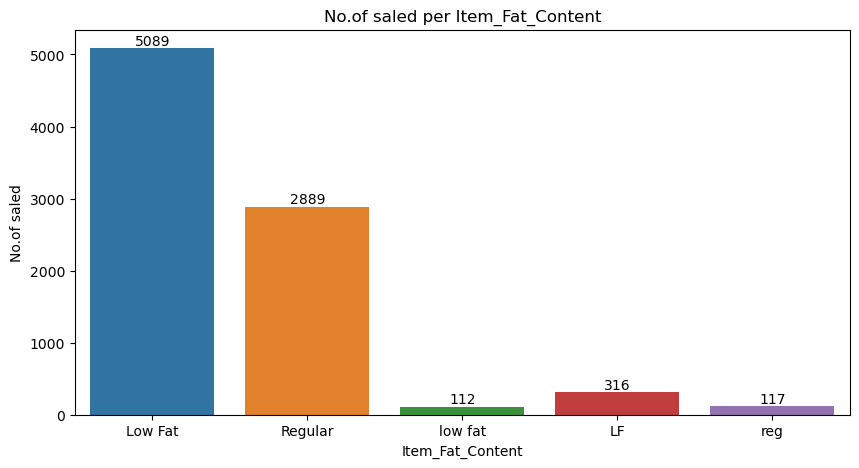

In [375]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'Item_Fat_Content', data = Bm_data )
for i in ax.containers:
    ax.bar_label(i,)
plt.title('No.of saled per Item_Fat_Content')
plt.ylabel('No.of saled')
plt.show()

- Low Fat items are more sold and having the highest saled
- Regular items are sold and having the second highest saled

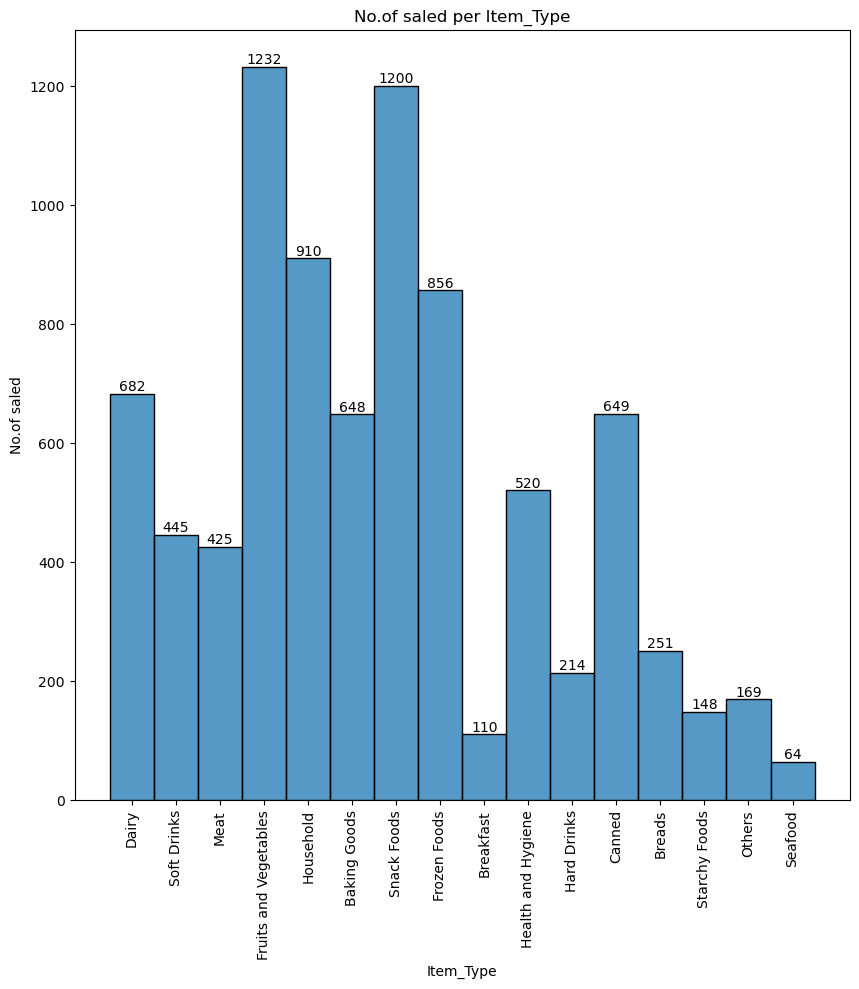

In [376]:
plt.figure(figsize = (10,10))
ax = sns.histplot(x = 'Item_Type', data = Bm_data)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('No.of saled per Item_Type')
plt.ylabel('No.of saled')
plt.xticks(rotation = 90)
plt.show()

- Fruits and vegetables items are more sold and having the highest saled
- Snack foods items are sold and having the second highest saled
- Household items are sold and having the third highest saled
- Remaining are respectively saled

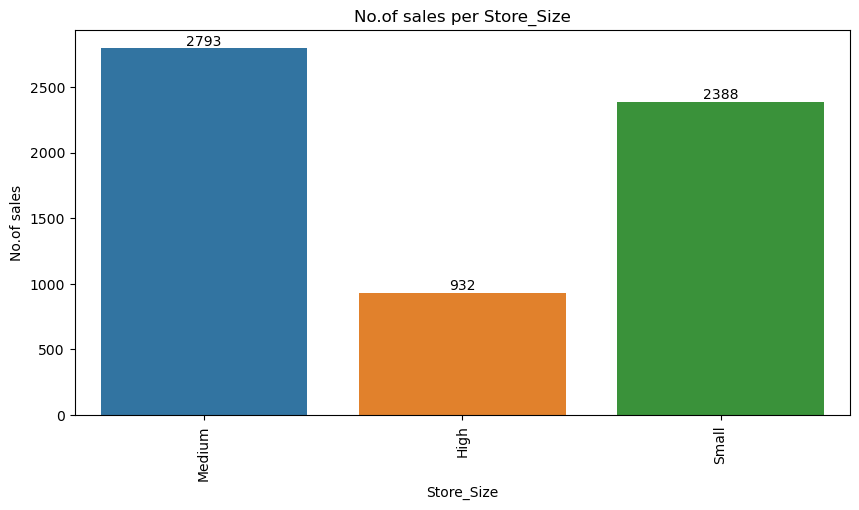

In [377]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'Store_Size', data = Bm_data )
for i in ax.containers:
    ax.bar_label(i,)
plt.title('No.of sales per Store_Size')
plt.ylabel('No.of sales')
plt.xticks(rotation = 90)
plt.show()

- More Saled rate is having at Medium Store Type
- Comparatively little less Saled rate is having at Small Store Type
- vice-versa

In [378]:
a = pd .DataFrame(Bm_data['Store_Type'].value_counts())
a

,Store_Type
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


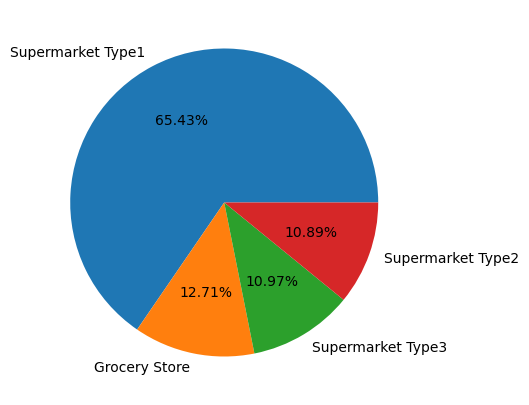

In [379]:
plt.figure(figsize = (10,5))
plt.pie(a.Store_Type,labels = a.index,autopct = '%.2f%%')
plt.show()

- Highest Sales percent is holds at Supermarket Type 1 with 65.43%
- second Highest Sales percent is holds at Grocery Store with 12.71%

C:\Users\nites\AppData\Local\Temp\ipykernel_2176\513239736.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Bm_data['Item_Weight'],kde = True, bins = (5,10,15,20,25,30))


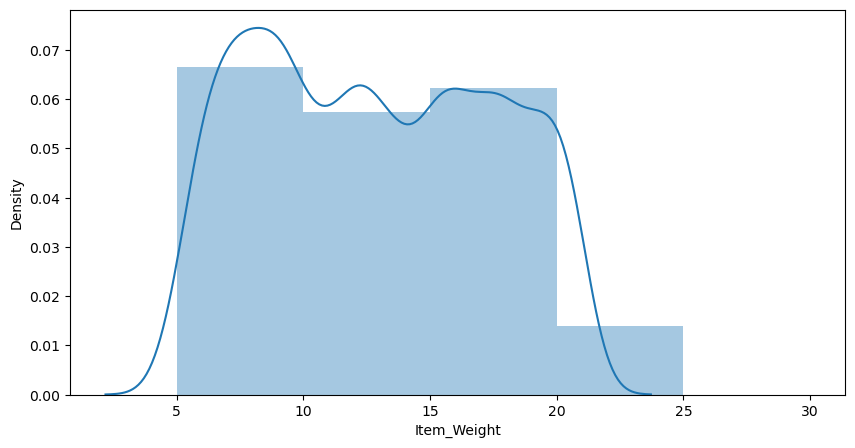

In [380]:
plt.figure(figsize = (10,5))
sns.distplot(Bm_data['Item_Weight'],kde = True, bins = (5,10,15,20,25,30))
plt.show()

- Item_weight vs density rate is noticed in between 5-25 binsize and the kernel density estimation is starts from before the binsize = 5 and ends before the binsize = 25
- The Kde or distplot tells the distribution of the weights.

# Bivariate Analysis

Numerical vs Categorical

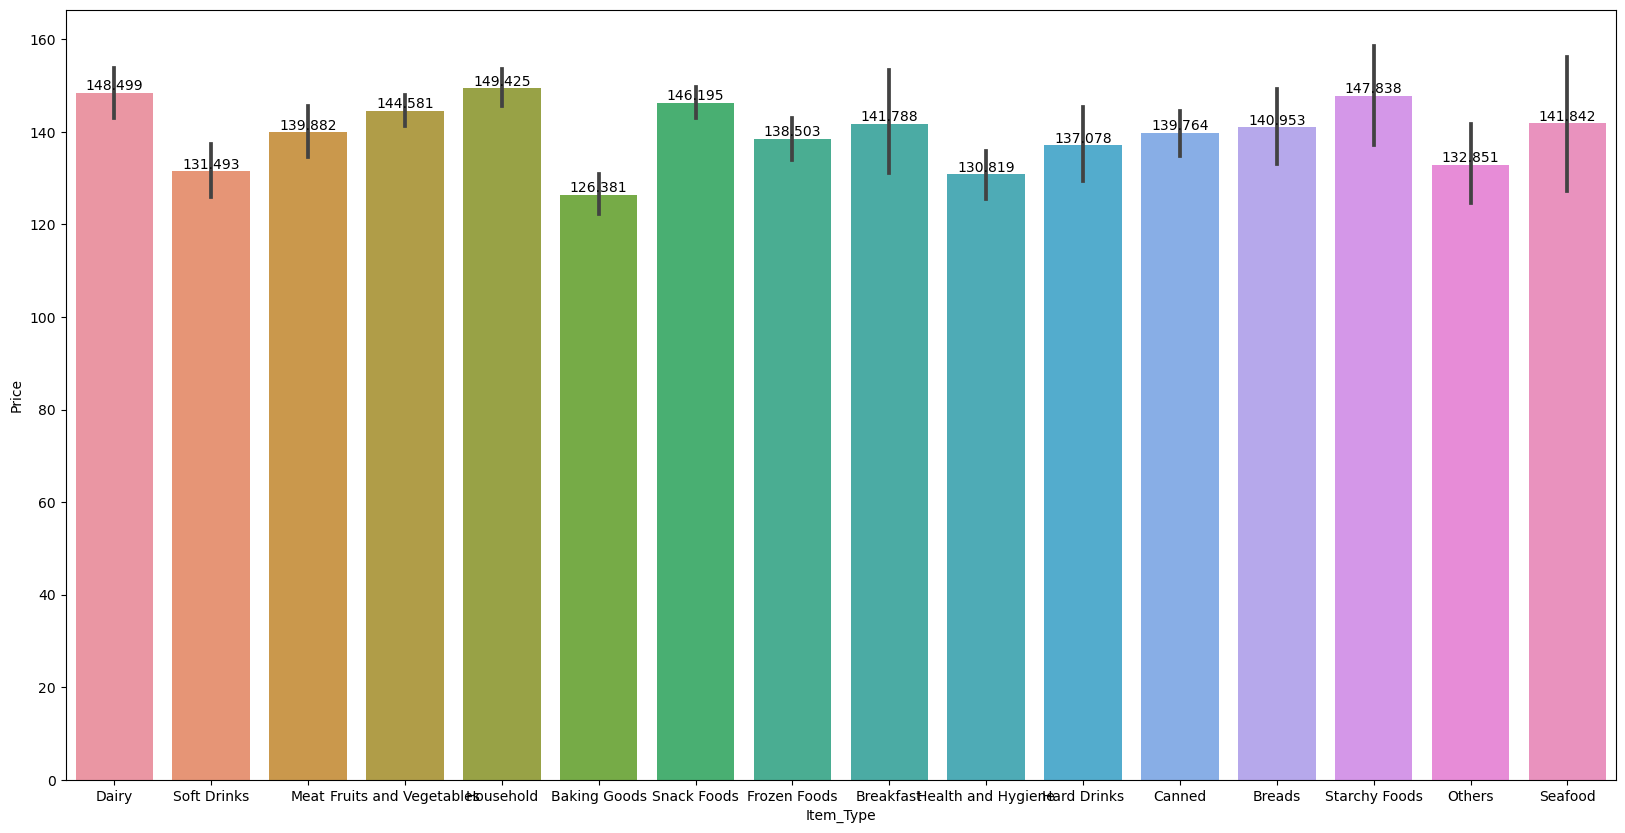

In [381]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x= 'Item_Type', y = 'Price', data = Bm_data )
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

- Highest price holds to the Household Items
- Second highest price holds to the Diary Items

In [382]:
Bm_data.head(1)

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Price,Store_Id,Store_Est_Year,Store_Size,Store_Loc_Type,Store_Type,Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


Numerical vs Numerical

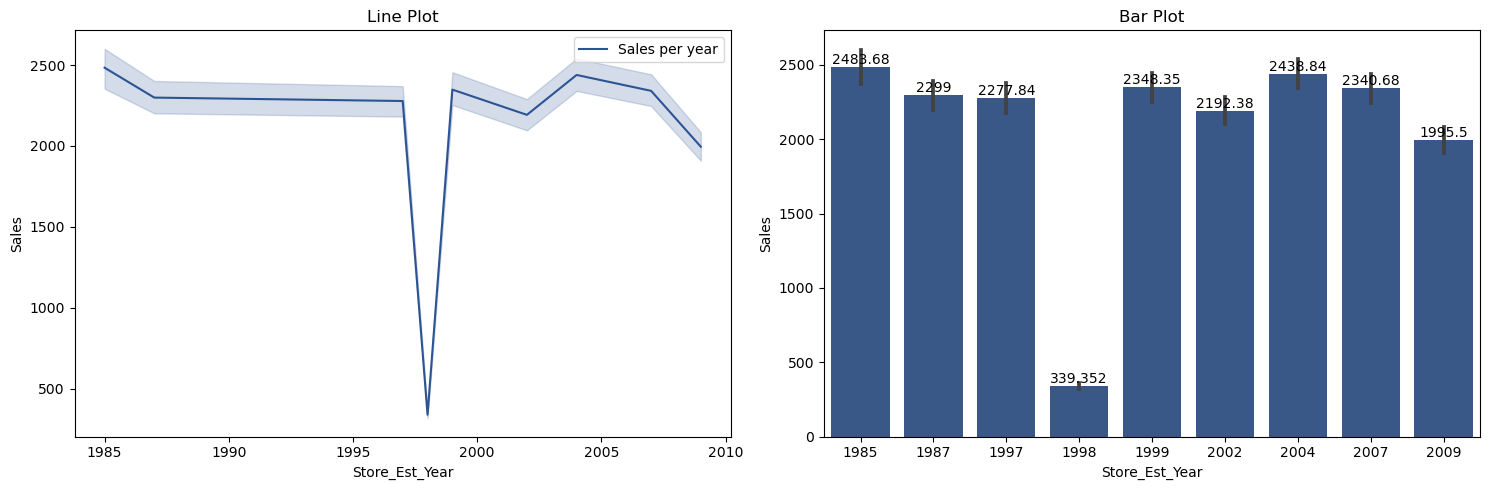

In [383]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize = (15,5))
sns.lineplot(x = 'Store_Est_Year',y = 'Sales', data = Bm_data,color='#2c5494',label = 'Sales per year', ax = ax1)
ax1.set_title('Line Plot')
sns.barplot(x = 'Store_Est_Year',y = 'Sales', data = Bm_data,color='#2c5494', ax =  ax2)
ax2.set_title('Bar Plot')
for i in ax2.containers:
    ax2.bar_label(i,)
plt.tight_layout()
plt.show()

- The Highest sales is holds in the year of 1985
- The second highest sales is holds in the year 

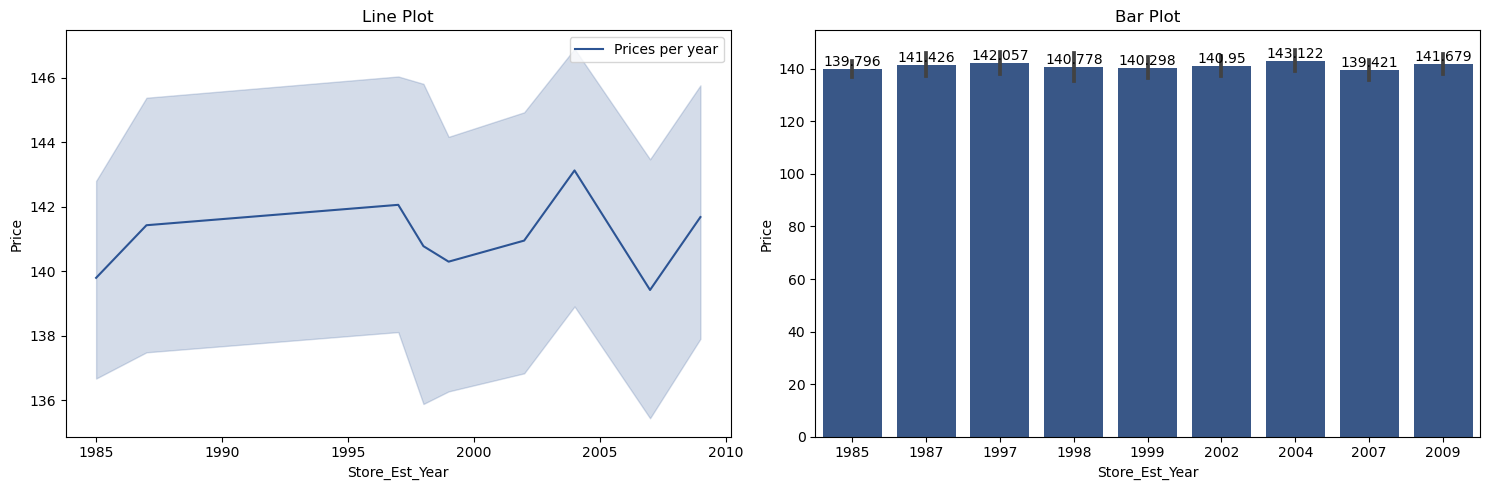

In [384]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize = (15,5))
sns.lineplot(x = 'Store_Est_Year',y = 'Price', data = Bm_data,color='#2c5494',label = 'Prices per year', ax = ax1)
ax1.set_title('Line Plot')
sns.barplot(x = 'Store_Est_Year',y = 'Price', data = Bm_data,color='#2c5494', ax =  ax2)
ax2.set_title('Bar Plot')
for i in ax2.containers:
    ax2.bar_label(i,)
plt.tight_layout()
plt.show()

- In 2004 the highest price value is noticed
- Secondly in 1997 the highest price value is notice
- Vice-Versa

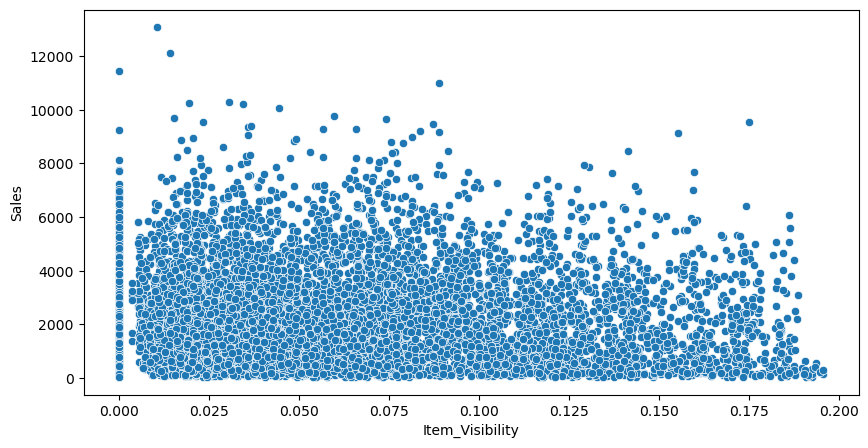

In [385]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'Item_Visibility',y = 'Sales',data = Bm_data)
plt.show()

- Item visibility is having a higher and strong relations with the sales
- Highest sales noticed at the low visibility

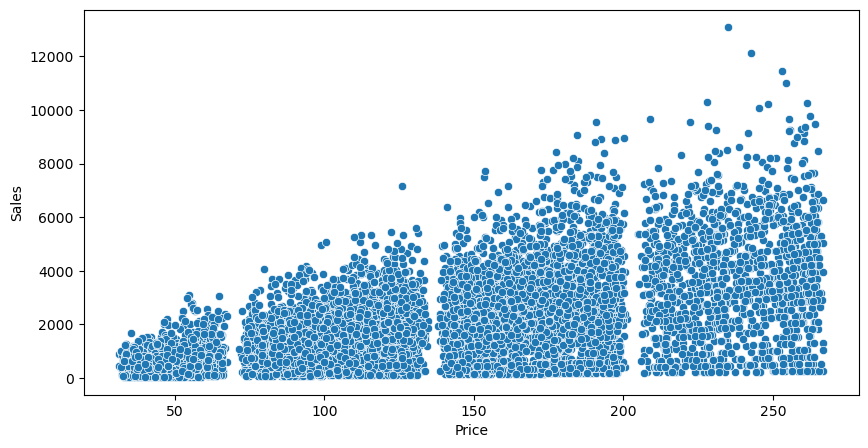

In [386]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'Price',y = 'Sales',data = Bm_data)
plt.show()

In [387]:
Bm_data.head(1)

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Price,Store_Id,Store_Est_Year,Store_Size,Store_Loc_Type,Store_Type,Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


Categorical vs Categorical

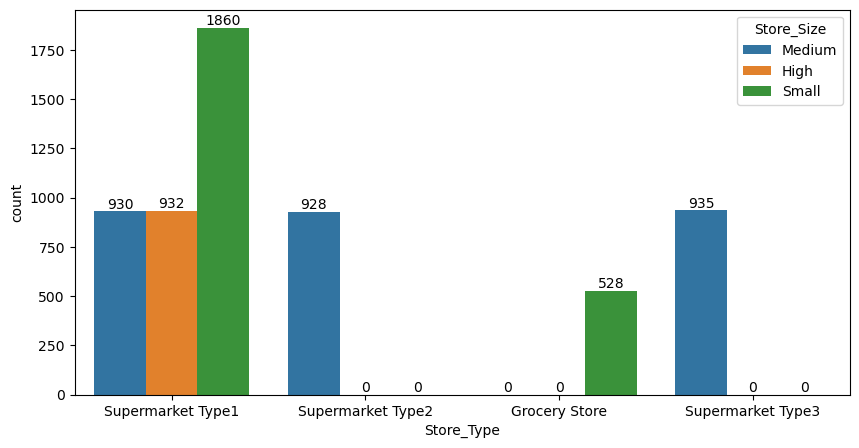

In [388]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'Store_Type',hue = 'Store_Size', data = Bm_data)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()


# Multi-Variate Analysis

In [389]:
Bm_data.head(1)

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Price,Store_Id,Store_Est_Year,Store_Size,Store_Loc_Type,Store_Type,Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


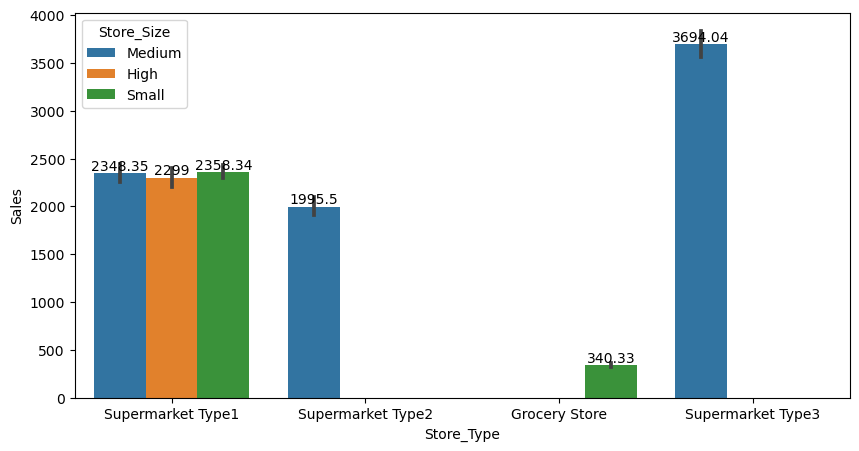

In [390]:
plt.figure(figsize = (10,5))
mv = sns.barplot(x = 'Store_Type', y = 'Sales',hue = 'Store_Size', data = Bm_data)
for i in mv.containers:
    mv.bar_label(i,)
plt.show()


- The highest sales is enconutered in Supermarket type 3 with the medium store size.

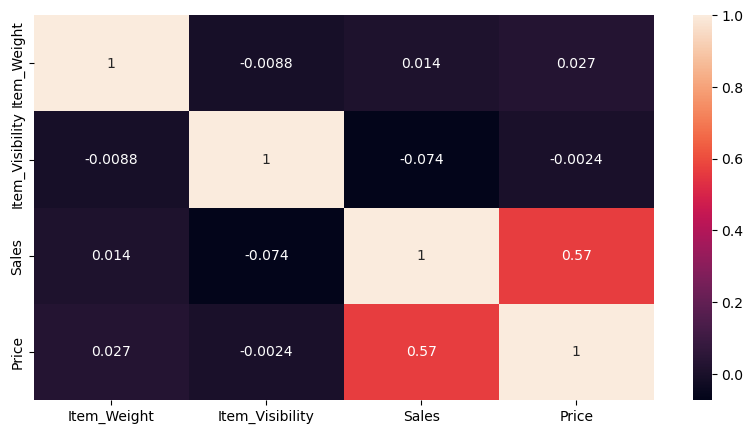

In [391]:
plt.figure(figsize = (10,5))
sns.heatmap(Bm_data[['Item_Weight','Item_Visibility','Sales','Price']].corr(),annot = True)
plt.show()

- sales with respect to price are highly positive correlated
- sales with respect to item_weight is low positive correlated
- Price with respect to  item weight is also low positive correlated

#### Treatment of Missing/Null values

In [392]:
Bm_data.isnull().sum()

Item_Id                0
Item_Weight         1463
Item_Fat_Content       0
Item_Visibility      144
Item_Type              0
Price                  0
Store_Id               0
Store_Est_Year         0
Store_Size          2410
Store_Loc_Type         0
Store_Type             0
Sales                  0
dtype: int64

In [393]:
Data_shape = np.product(Bm_data.shape)
null_values_data = Bm_data.isnull().sum()
null_values = null_values_data.sum()
percentage_of_null = (null_values/Data_shape)*100
percentage_of_null

3.927607649888537

- There is 3.786 % of missing values from the entire train data set

In [394]:
Bm_test_data.isnull().sum()

Item_Id                0
Item_Weight          976
Item_Fat_Content       0
Item_Visibility        0
Item_Type              0
Price                  0
Store_Id               0
Store_Est_Year         0
Store_Size          1606
Store_Loc_Type         0
Store_Type             0
dtype: int64

In [395]:
Data_shape = np.product(Bm_test_data.shape)
null_values_data = Bm_test_data.isnull().sum()
null_values = null_values_data.sum()
percentage_of_null = (null_values/Data_shape)*100
percentage_of_null

4.131794978476901

- There is 4.131 % of missing values from the entire train data set

### Summary of Null Values

- Here in this data we cannot drop the null values beacause store size is a important column and aslo item weight is also a important column.
- If we drop the Null values then it is affecting the remaining column and we are lossing the information/ data of the remaining columns.
- Here , also we cannot do the forward-fill (ffill) or backward-fill (bfill), beacuse the null values are together up and down so we cann't
- so if we are doing the ffill or bfill then again we will find the null values.
- So to overcome all the things we will use here mean.

In [396]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
Bm_data['Item_Weight'] = imputer.fit_transform(Bm_data[['Item_Weight']])

In [397]:
Bm_test_data['Item_Weight'] = imputer.transform(Bm_test_data[['Item_Weight']])

In [398]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
Bm_data['Item_Visibility'] = imputer.fit_transform(Bm_data[['Item_Visibility']])

In [399]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
Bm_data['Store_Size'] = imputer.fit_transform(Bm_data[['Store_Size']])

In [400]:
Bm_test_data['Store_Size'] = imputer.transform(Bm_test_data[['Store_Size']])

In [401]:
Bm_data.isnull().sum()

Item_Id             0
Item_Weight         0
Item_Fat_Content    0
Item_Visibility     0
Item_Type           0
Price               0
Store_Id            0
Store_Est_Year      0
Store_Size          0
Store_Loc_Type      0
Store_Type          0
Sales               0
dtype: int64

In [402]:
Bm_data.shape

(8523, 12)

In [403]:
Bm_data.describe()

,Item_Weight,Item_Visibility,Price,Store_Est_Year,Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.063061,140.992782,1997.831867,2181.288914
std,4.226124,0.045738,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.091097,185.643700,2004.000000,3101.296400
max,21.350000,0.195721,266.888400,2009.000000,13086.964800


In [404]:
Bm_test_data.isnull().sum()

Item_Id             0
Item_Weight         0
Item_Fat_Content    0
Item_Visibility     0
Item_Type           0
Price               0
Store_Id            0
Store_Est_Year      0
Store_Size          0
Store_Loc_Type      0
Store_Type          0
dtype: int64

In [405]:
Bm_test_data.shape

(5681, 11)

In [406]:
Bm_test_data.describe()

,Item_Weight,Item_Visibility,Price,Store_Est_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.723467,0.065684,141.023273,1997.828903
std,4.245629,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.857645,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# Feature Engineering

In [407]:
Bm_data.head(1)

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Price,Store_Id,Store_Est_Year,Store_Size,Store_Loc_Type,Store_Type,Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [408]:
X = Bm_data[['Item_Id','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Price','Store_Id','Store_Est_Year','Store_Size','Store_Loc_Type','Store_Type']]
y = Bm_data['Sales']

In [409]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

#Feature selection for Numerical Features

X_num = X.select_dtypes(include = ['int64','float64'])
model = LinearRegression()
rfe = RFE(model, n_features_to_select=4)  # Select top 5 numerical features

y = Bm_data.Sales
rfe.fit(X_num, y)

selected_numerical_features = list(X_num.columns[rfe.support_])

#Feature selection for Categorical Features
X_cat = X.select_dtypes(include = ['object'])
# we need to first do the label encoding
label_encoder = LabelEncoder()
X_cat_encoded = X_cat.apply(label_encoder.fit_transform)

# create a model for Random Forest Regressor model
model = RandomForestRegressor()
model.fit(X_cat_encoded,y)
feature_importance_categorical = model.feature_importances_

# creating DataFrame for numerical and categorical features with their important score
num_features_df = pd.DataFrame({'Feature':X_num.columns,'selected':selected_numerical_features})
#num_features_df = pd.DataFrame({'Feature':selected_numerical_features})
cat_features_df = pd.DataFrame({'Feature':X_cat.columns,'Importance':feature_importance_categorical})
#cat_features_df = pd.DataFrame({'Feature':feature_importance_categorical})

#Display the selected numerical features and categorical features
print("selected Numerical Features :")
print(selected_numerical_features)
print("\nTop Categorical Features: ")
cat_features_df

selected Numerical Features :
['Item_Weight', 'Item_Visibility', 'Price', 'Store_Est_Year']

Top Categorical Features: 


,Feature,Importance
0,Item_Id,0.525330
1,Item_Fat_Content,0.044337
2,Item_Type,0.097223
3,Store_Id,0.047425
4,Store_Size,0.024841
5,Store_Loc_Type,0.019640
6,Store_Type,0.241204


- As it has given the top best numerical features and categorical features
- --> In numerical columns as my n_selected_features are 4
- I got it as ['Item_Weight', 'Item_Visibility', 'Price', 'Store_Est_Year']
- --> In categorical columns as i have given feature importances
- I got the score accordingly , the highest the value suggest greater importance of the feature in predicting the target variable.

In [410]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select = 3)
rfe.fit(X_num, y)

selected_numerical_features = list(X_num.columns[rfe.support_])
label_encoder = LabelEncoder()
X_cat_encoded = X_cat.apply(label_encoder.fit_transform)

model = RandomForestRegressor()
model.fit(X_cat_encoded,y)
feature_importance_categorical = model.feature_importances_

#Display the selected numerical features and categorical features
print("selected Numerical Features :")
print(selected_numerical_features)
print("\nTop Categorical Features: ")
#cat_features_df
print(feature_importance_categorical)

selected Numerical Features :
['Item_Visibility', 'Price', 'Store_Est_Year']

Top Categorical Features: 
[0.52529898 0.04587215 0.09455556 0.04902337 0.02494861 0.02029869
 0.24000263]


- As it has given the top best numerical features and categorical features
- --> In numerical columns as my n_selected_features are 3
- I got it as ['Item_Visibility', 'Price', 'Store_Est_Year']
- --> In categorical columns as i have given feature importances
- I got the score accordingly , the highest the value suggest greater importance of the feature in predicting the target variable.

In [411]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select = 2)
rfe.fit(X_num, y)

selected_numerical_features = list(X_num.columns[rfe.support_])
label_encoder = LabelEncoder()
X_cat_encoded = X_cat.apply(label_encoder.fit_transform)

model = RandomForestRegressor()
model.fit(X_cat_encoded,y)
feature_importance_categorical = model.feature_importances_

#Display the selected numerical features and categorical features
print("selected Numerical Features :")
print(selected_numerical_features)
print("\nTop Categorical Features: ")
#cat_features_df
print(feature_importance_categorical)

selected Numerical Features :
['Item_Visibility', 'Price']

Top Categorical Features: 
[0.53010431 0.04365318 0.09566753 0.04612357 0.02380534 0.01965165
 0.24099442]


- As it has given the top best numerical features and categorical features
- --> In numerical columns as my n_selected_features are 2
- I got it as ['Item_Visibility', 'Price']
- --> In categorical columns as i have given feature importances
- I got the score accordingly , the highest the value suggest greater importance of the feature in predicting the target variable.

# Encoding Categorical Variables

In [412]:
label_encoder = LabelEncoder()
X_cat_encoded = X_cat.apply(label_encoder.fit_transform)

model = RandomForestRegressor()
model.fit(X_cat_encoded,y)
feature_importance_categorical = model.feature_importances_
cat_features_df = pd.DataFrame({'Feature':X_cat.columns,'Importance':feature_importance_categorical})
print("\nTop Categorical Features: ")
cat_features_df


Top Categorical Features: 


,Feature,Importance
0,Item_Id,0.526963
1,Item_Fat_Content,0.045025
2,Item_Type,0.096235
3,Store_Id,0.047507
4,Store_Size,0.024266
5,Store_Loc_Type,0.019930
6,Store_Type,0.240074


### Here after im not considering the ITEM_ID and STORE_ID,ITEM_WEIGHT because these are not giving any impact in the model , considering report of feature importance

In [413]:
X_algo = Bm_data[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Price','Store_Est_Year','Store_Size','Store_Loc_Type','Store_Type']]
y_algo = Bm_data['Sales']

- #### Now im splitting the train data into training and validation purpose.
- #### Anyhow i will make transform my test data but not use in the validation/prediction /// Rather i will use in final predictions

In [414]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X_algo,y_algo,test_size = 0.2,random_state=100)

In [415]:
X_train.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Price,Store_Est_Year,Store_Size,Store_Loc_Type,Store_Type
747,18.5,Regular,0.0,Dairy,144.2102,2004,Small,Tier 2,Supermarket Type1


In [416]:
y_train.head(1)

747    2041.3428
Name: Sales, dtype: float64

In [417]:
X_valid.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Price,Store_Est_Year,Store_Size,Store_Loc_Type,Store_Type
3454,20.7,Low Fat,0.169667,Canned,183.5266,1987,High,Tier 3,Supermarket Type1


In [418]:
y_valid.head(1)

3454    4426.2384
Name: Sales, dtype: float64

- Here X_train,y_train are 70% of the train data
- Here X_valid, y_valid are the rest 30 % of the train data

#### Separating the categorical and Numerical Columns

In [419]:
X_test = Bm_test_data[['Item_Id','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Price','Store_Id','Store_Est_Year','Store_Size','Store_Loc_Type','Store_Type']]

In [420]:
X_train_num = X_train[['Store_Est_Year', 'Item_Visibility', 'Price']]
X_train_cat = X_train[['Item_Type']]
X_train_cat_le = X_train[['Item_Fat_Content','Store_Size','Store_Loc_Type','Store_Type']]

In [421]:
X_valid_num = X_valid[['Store_Est_Year', 'Item_Visibility', 'Price']]
X_valid_cat = X_valid[['Item_Type']]
X_valid_cat_le = X_valid[['Item_Fat_Content','Store_Size','Store_Loc_Type','Store_Type']]

In [422]:
X_test_num = X_test[['Store_Est_Year', 'Item_Visibility', 'Price']]
X_test_cat = X_test[['Item_Type']]
X_test_cat_le = X_test[['Item_Fat_Content','Store_Size','Store_Loc_Type','Store_Type']]

# Label Encoding

In [423]:
X_train_cat_le['Item_Fat_Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [424]:
fat_cont = {'Low Fat':1,'Regular':2,'LF':1,'low fat':1,'reg':2}
X_train_cat_le['Item_Fat_Content'] = X_train_cat_le['Item_Fat_Content'].apply(lambda x : fat_cont[x])
X_valid_cat_le['Item_Fat_Content'] = X_valid_cat_le['Item_Fat_Content'].apply(lambda x : fat_cont[x])
X_test_cat_le['Item_Fat_Content'] = X_test_cat_le['Item_Fat_Content'].apply(lambda x : fat_cont[x])

C:\Users\nites\AppData\Local\Temp\ipykernel_2176\1660831610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_le['Item_Fat_Content'] = X_train_cat_le['Item_Fat_Content'].apply(lambda x : fat_cont[x])
C:\Users\nites\AppData\Local\Temp\ipykernel_2176\1660831610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_cat_le['Item_Fat_Content'] = X_valid_cat_le['Item_Fat_Content'].apply(lambda x : fat_cont[x])
C:\Users\nites\AppData\Local\Temp\ipykernel_2176\1660831610.py:4: SettingWithCopyWar

In [425]:
X_train_cat_le['Store_Size'].unique()

array(['Small', 'Medium', 'High'], dtype=object)

In [426]:
store_size = {'High':1,'Medium':2,'Small':3}
X_train_cat_le['Store_Size'] = X_train_cat_le['Store_Size'].apply(lambda x : store_size[x])
X_valid_cat_le['Store_Size'] = X_valid_cat_le['Store_Size'].apply(lambda x : store_size[x])
X_test_cat_le['Store_Size'] = X_test_cat_le['Store_Size'].apply(lambda x : store_size[x])

C:\Users\nites\AppData\Local\Temp\ipykernel_2176\1955302253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_le['Store_Size'] = X_train_cat_le['Store_Size'].apply(lambda x : store_size[x])
C:\Users\nites\AppData\Local\Temp\ipykernel_2176\1955302253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_cat_le['Store_Size'] = X_valid_cat_le['Store_Size'].apply(lambda x : store_size[x])
C:\Users\nites\AppData\Local\Temp\ipykernel_2176\1955302253.py:4: SettingWithCopyWarning: 
A value is tr

In [427]:
X_train_cat_le['Store_Loc_Type'].unique()

array(['Tier 2', 'Tier 3', 'Tier 1'], dtype=object)

In [428]:
store_loc_type = {'Tier 1':1,'Tier 2':2,'Tier 3':3}
X_train_cat_le['Store_Loc_Type'] = X_train_cat_le['Store_Loc_Type'].apply(lambda x : store_loc_type[x])
X_valid_cat_le['Store_Loc_Type'] = X_valid_cat_le['Store_Loc_Type'].apply(lambda x : store_loc_type[x])
X_test_cat_le['Store_Loc_Type'] = X_test_cat_le['Store_Loc_Type'].apply(lambda x : store_loc_type[x])

C:\Users\nites\AppData\Local\Temp\ipykernel_2176\55439067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_le['Store_Loc_Type'] = X_train_cat_le['Store_Loc_Type'].apply(lambda x : store_loc_type[x])
C:\Users\nites\AppData\Local\Temp\ipykernel_2176\55439067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_cat_le['Store_Loc_Type'] = X_valid_cat_le['Store_Loc_Type'].apply(lambda x : store_loc_type[x])
C:\Users\nites\AppData\Local\Temp\ipykernel_2176\55439067.py:4: SettingWithCopyWarni

In [429]:
X_train_cat_le['Store_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)

In [430]:
store_type = {'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3,'Grocery Store':4}
X_train_cat_le['Store_Type'] = X_train_cat_le['Store_Type'].apply(lambda x : store_type[x])
X_valid_cat_le['Store_Type'] = X_valid_cat_le['Store_Type'].apply(lambda x : store_type[x])
X_test_cat_le['Store_Type'] = X_test_cat_le['Store_Type'].apply(lambda x : store_type[x])

C:\Users\nites\AppData\Local\Temp\ipykernel_2176\2752771344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_le['Store_Type'] = X_train_cat_le['Store_Type'].apply(lambda x : store_type[x])
C:\Users\nites\AppData\Local\Temp\ipykernel_2176\2752771344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_cat_le['Store_Type'] = X_valid_cat_le['Store_Type'].apply(lambda x : store_type[x])
C:\Users\nites\AppData\Local\Temp\ipykernel_2176\2752771344.py:4: SettingWithCopyWarning: 
A value is tr

In [431]:
X_train_cat_le.head(1)

,Item_Fat_Content,Store_Size,Store_Loc_Type,Store_Type
747,2,3,2,1


In [432]:
X_valid_cat_le.head(1)

,Item_Fat_Content,Store_Size,Store_Loc_Type,Store_Type
3454,1,1,3,1


In [433]:
X_test_cat_le.head(1)

,Item_Fat_Content,Store_Size,Store_Loc_Type,Store_Type
0,1,2,1,1


# One Hot Encoding

In [434]:
X_train.dtypes

Item_Weight         float64
Item_Fat_Content     object
Item_Visibility     float64
Item_Type            object
Price               float64
Store_Est_Year        int64
Store_Size           object
Store_Loc_Type       object
Store_Type           object
dtype: object

In [435]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop ='first', sparse_output=False,handle_unknown='error')
X_train_cat_oh = pd.DataFrame(ohe.fit_transform(X_train_cat),columns = ohe.get_feature_names_out(X_train_cat.columns),index = X_train_cat.index)
X_train_cat_oh.head(1)

,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
747,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [436]:
X_valid_cat_oh = pd.DataFrame(ohe.transform(X_valid_cat),columns = ohe.get_feature_names_out(X_valid_cat.columns),index = X_valid_cat.index)
X_valid_cat_oh.head(1)

,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
3454,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [437]:
X_test_cat_oh = pd.DataFrame(ohe.transform(X_test_cat),columns = ohe.get_feature_names_out(X_test_cat.columns),index = X_test_cat.index)
X_test_cat_oh.head(1)

,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Pre-Processing Data

In [438]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_rescale = pd.DataFrame(scaler.fit_transform(X_train_num),columns = X_train_num.columns,index = X_train_num.index)
X_train_rescale.head(1)

,Store_Est_Year,Item_Visibility,Price
747,0.742659,-1.385893,0.056844


In [439]:
X_valid_rescale = pd.DataFrame(scaler.transform(X_valid_num),columns = X_valid_num.columns,index = X_valid_num.index)
X_valid_rescale.head(1)

,Store_Est_Year,Item_Visibility,Price
3454,-1.294031,2.352608,0.687464


In [440]:
X_test_rescale = pd.DataFrame(scaler.transform(X_test_num),columns = X_test_num.columns,index = X_test_num.index)
X_test_rescale.head(1)

,Store_Est_Year,Item_Visibility,Price
0,0.143633,-1.219207,-0.526165


#### Contacting the transformed columns

In [441]:
X_train_transformed = pd.concat([X_train_rescale,X_train_cat_le,X_train_cat_oh],axis = 1)
X_train_transformed.head(1)

,Store_Est_Year,Item_Visibility,Price,Item_Fat_Content,Store_Size,Store_Loc_Type,Store_Type,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
747,0.742659,-1.385893,0.056844,2,3,2,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [442]:
X_valid_transformed = pd.concat([X_valid_rescale,X_valid_cat_le,X_valid_cat_oh],axis = 1)
X_valid_transformed.head(1)

,Store_Est_Year,Item_Visibility,Price,Item_Fat_Content,Store_Size,Store_Loc_Type,Store_Type,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
3454,-1.294031,2.352608,0.687464,1,1,3,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [443]:
X_test_transformed = pd.concat([X_test_rescale,X_test_cat_le,X_test_cat_oh],axis = 1)
X_test_transformed.head(1)

,Store_Est_Year,Item_Visibility,Price,Item_Fat_Content,Store_Size,Store_Loc_Type,Store_Type,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0.143633,-1.219207,-0.526165,1,2,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Modelling

- Modeling in machine learning is the creation of mathematical representations using algorithms trained on data. 
- These models predict outcomes, uncover patterns, and provide insights from new information. 
- They aid in decision-making, process optimization, and automation of tasks. 
- Modeling allows for generalization to new data, scalability across domains, and offers a data-driven approach for informed actions.

#### Linear Regression

### Model 1

In [444]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

LinearRegression()

In [445]:
print('y intercept: ',lr.intercept_)
print('slope: ',lr.coef_)

y intercept:  795.6267291094832
slope:  [-411.39432224  -60.26390442  965.66082209   56.66956612  500.90771362
  616.70060702 -644.68436906   -2.46003305  -16.24284577   49.60561523
  -19.22283424    4.96617006   37.47890942   63.75278012   18.89466001
  -16.39440079   58.77130313   31.34007023  304.14219227   22.04974489
  -29.68028407  -37.95221755]


In [446]:
y_valid_predict = lr.predict(X_valid_transformed)

In [447]:
df1 = pd.DataFrame({'y_actual':y_valid,'y_predicted':y_valid_predict})
df1

,y_actual,y_predicted
3454,4426.2384,3662.663923
3386,4845.0266,3866.521048
235,2293.0152,3299.305348
7201,1065.2800,1518.380795
7782,2345.6134,3099.879726
...,...,...
1994,3207.8244,2718.975131
6557,2263.7200,2375.102936
3875,1906.8512,2768.428423
7552,2773.0570,2337.112455


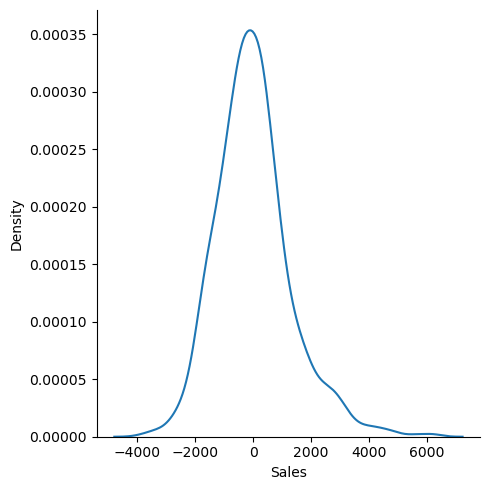

In [448]:
residual = y_valid - y_valid_predict

sns.displot(residual, kind='kde')

In [449]:
from sklearn import metrics

print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y_valid, y_valid_predict))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_valid, y_valid_predict)))
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_valid, y_valid_predict))

Mean Squared Error(MSE):  1725213.0262241517
Root Mean Squared Error(RMSE):  1313.4736488503115
Mean Absolute Error(MAE):  983.0444465732194


<Axes: xlabel='Sales', ylabel='Count'>

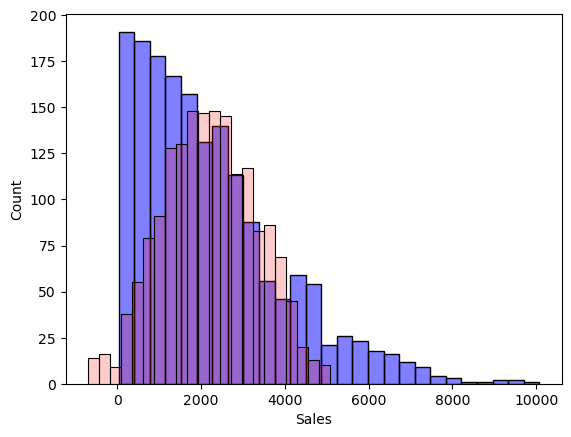

In [450]:
sns.histplot(y_valid, color='blue', alpha=0.5)
sns.histplot(y_valid_predict, color='red', alpha=0.2)

#### Regularized Linear Regression

### Model 2

In [451]:
from sklearn.linear_model import Lasso
la = Lasso(alpha=2.0,fit_intercept=True)
la.fit(X_train_transformed,y_train)

Lasso(alpha=2.0)

In [452]:
print('y intercept: ',la.intercept_)
print('slope: ',la.coef_)

y intercept:  889.5046256198664
slope:  [-403.31327214  -59.04193434  963.64444871   51.65349946  476.96772233
  599.5433561  -634.5275115    -0.           -0.            7.68666055
  -10.4109897    -0.            8.21038229    0.            0.
  -15.46083279    2.50183238    0.           31.0408246     0.
   -7.12300763   -0.        ]


In [453]:
y_valid_predict1 = la.predict(X_valid_transformed)
df2 = pd.DataFrame({'y_actual':y_valid,'y_predicted':y_valid_predict1})
df2

,y_actual,y_predicted
3454,4426.2384,3635.383415
3386,4845.0266,3845.853875
235,2293.0152,3240.930675
7201,1065.2800,1525.984234
7782,2345.6134,3073.074507
...,...,...
1994,3207.8244,2699.470692
6557,2263.7200,2367.102911
3875,1906.8512,2790.007991
7552,2773.0570,2358.533671


In [454]:
from sklearn import metrics

print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y_valid, y_valid_predict1))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_valid, y_valid_predict1)))
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_valid, y_valid_predict1))

Mean Squared Error(MSE):  1723687.4323466835
Root Mean Squared Error(RMSE):  1312.892772600521
Mean Absolute Error(MAE):  981.7344769865631


<Axes: xlabel='Sales', ylabel='Count'>

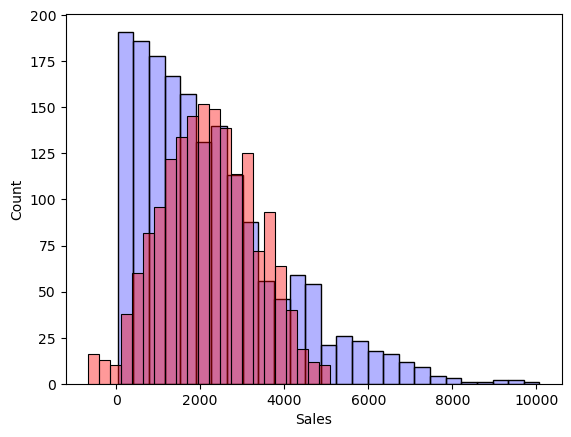

In [455]:
sns.histplot(y_valid, color='blue', alpha=0.3)
sns.histplot(y_valid_predict1, color='red', alpha=0.4)

### Model 3

In [456]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_transformed,y_train)

SVR()

In [457]:
y_valid_predict2 = svr.predict(X_valid_transformed)
df3 = pd.DataFrame({'y_actual':y_valid,'y_predicted':y_valid_predict2})
df3

,y_actual,y_predicted
3454,4426.2384,1872.897920
3386,4845.0266,2140.709151
235,2293.0152,1844.949263
7201,1065.2800,1724.617072
7782,2345.6134,1952.190572
...,...,...
1994,3207.8244,1840.866686
6557,2263.7200,1739.418268
3875,1906.8512,1813.357135
7552,2773.0570,1890.036206


In [458]:
from sklearn import metrics

print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y_valid, y_valid_predict2))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_valid, y_valid_predict2)))
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_valid, y_valid_predict2))

Mean Squared Error(MSE):  2774988.9494758034
Root Mean Squared Error(RMSE):  1665.8298080763843
Mean Absolute Error(MAE):  1208.4639572888852


- Model 3 is completely a bad model is giving excess error

<Axes: xlabel='Sales', ylabel='Count'>

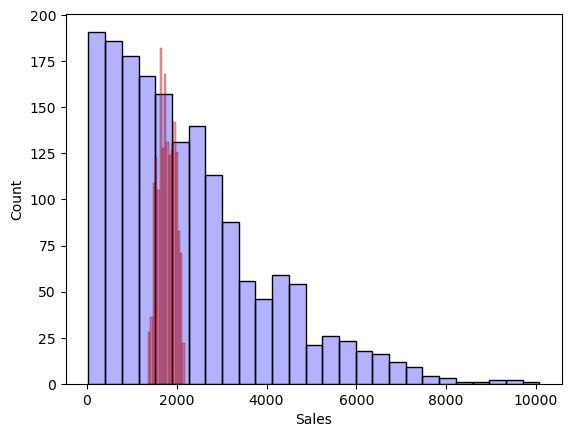

In [459]:
sns.histplot(y_valid, color='blue', alpha=0.3)
sns.histplot(y_valid_predict2, color='red', alpha=0.4)

#### Random Forest

### Model 4

In [460]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train_transformed,y_train)

RandomForestRegressor(n_estimators=10)

In [461]:
y_valid_predict3 = svr.predict(X_valid_transformed)
df4 = pd.DataFrame({'y_actual':y_valid,'y_predicted':y_valid_predict3})
df4

,y_actual,y_predicted
3454,4426.2384,1872.897920
3386,4845.0266,2140.709151
235,2293.0152,1844.949263
7201,1065.2800,1724.617072
7782,2345.6134,1952.190572
...,...,...
1994,3207.8244,1840.866686
6557,2263.7200,1739.418268
3875,1906.8512,1813.357135
7552,2773.0570,1890.036206


In [462]:
from sklearn import metrics

print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y_valid, y_valid_predict3))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_valid, y_valid_predict3)))
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_valid, y_valid_predict3))

Mean Squared Error(MSE):  2774988.9494758034
Root Mean Squared Error(RMSE):  1665.8298080763843
Mean Absolute Error(MAE):  1208.4639572888852


<Axes: xlabel='Sales', ylabel='Count'>

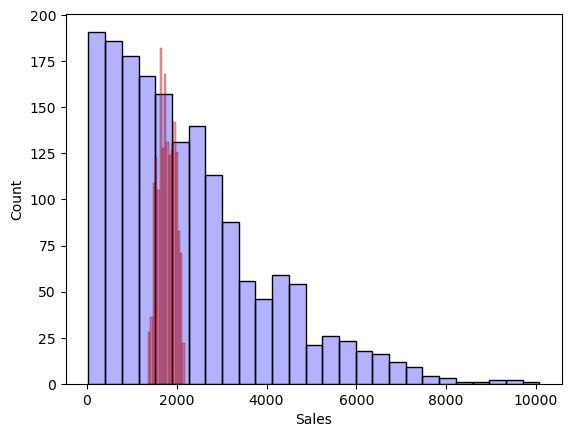

In [463]:
sns.histplot(y_valid, color='blue', alpha=0.3)
sns.histplot(y_valid_predict3, color='red', alpha=0.4)

#### GradientBoostingRegressor

### Model 5

In [464]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train_transformed,y_train)

GradientBoostingRegressor()

In [465]:
y_valid_predict4 = gbr.predict(X_valid_transformed)
df5 = pd.DataFrame({'y_actual':y_valid,'y_predicted':y_valid_predict4})
df5

,y_actual,y_predicted
3454,4426.2384,3115.682392
3386,4845.0266,4283.826828
235,2293.0152,5211.111281
7201,1065.2800,1724.867380
7782,2345.6134,2826.583247
...,...,...
1994,3207.8244,2509.129579
6557,2263.7200,1436.734745
3875,1906.8512,2007.911939
7552,2773.0570,2624.522480


In [466]:
from sklearn import metrics
print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y_valid, y_valid_predict4))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_valid, y_valid_predict4)))
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_valid, y_valid_predict4))

Mean Squared Error(MSE):  1229076.0383088354
Root Mean Squared Error(RMSE):  1108.6370182836379
Mean Absolute Error(MAE):  782.4195397987702


<Axes: xlabel='Sales', ylabel='Count'>

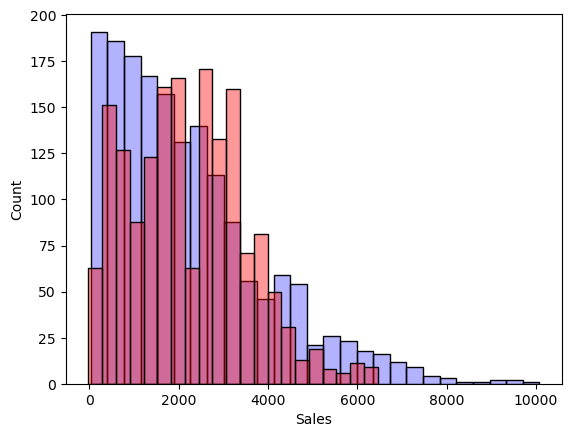

In [467]:
sns.histplot(y_valid, color='blue', alpha=0.3)
sns.histplot(y_valid_predict4, color='red', alpha=0.4)

#### ADABOOST Regressor

### MOBEL 6

In [468]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()
abr.fit(X_train_transformed,y_train)

AdaBoostRegressor()

In [469]:
y_valid_predict8 = abr.predict(X_valid_transformed)
df8 = pd.DataFrame({'y_actual':y_valid,'y_predicted':y_valid_predict8})
df8

,y_actual,y_predicted
3454,4426.2384,3702.599310
3386,4845.0266,4879.537306
235,2293.0152,4807.314074
7201,1065.2800,1900.277031
7782,2345.6134,3443.053581
...,...,...
1994,3207.8244,2410.225861
6557,2263.7200,1716.376824
3875,1906.8512,2110.113807
7552,2773.0570,3153.971932


In [470]:
from sklearn import metrics

print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y_valid, y_valid_predict8))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_valid, y_valid_predict8)))
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_valid, y_valid_predict8))

Mean Squared Error(MSE):  1362121.665907865
Root Mean Squared Error(RMSE):  1167.0996812217304
Mean Absolute Error(MAE):  865.8344553573309


<Axes: xlabel='Sales', ylabel='Count'>

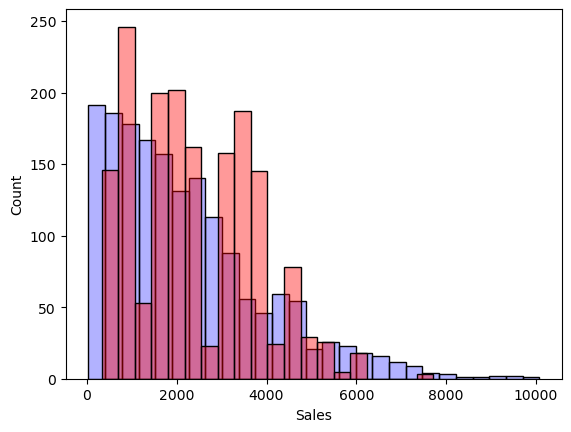

In [471]:
sns.histplot(y_valid, color='blue', alpha=0.3)
sns.histplot(y_valid_predict8, color='red', alpha=0.4)

### Hyper Parameter Tuning

### Model 7

In [472]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth= 3,n_estimators=100)
gbr.fit(X_train_transformed,y_train)

GradientBoostingRegressor()

In [473]:
y_valid_predict5 = gbr.predict(X_valid_transformed)
df5 = pd.DataFrame({'y_actual':y_valid,'y_predicted':y_valid_predict5})
df5

,y_actual,y_predicted
3454,4426.2384,3115.682392
3386,4845.0266,4283.826828
235,2293.0152,5211.111281
7201,1065.2800,1724.867380
7782,2345.6134,2826.583247
...,...,...
1994,3207.8244,2509.129579
6557,2263.7200,1436.734745
3875,1906.8512,2007.911939
7552,2773.0570,2624.522480


In [474]:
from sklearn import metrics

print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y_valid, y_valid_predict5))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_valid, y_valid_predict5)))
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_valid, y_valid_predict5))

Mean Squared Error(MSE):  1228966.0095761002
Root Mean Squared Error(RMSE):  1108.5873937476017
Mean Absolute Error(MAE):  782.3350749659256


<Axes: xlabel='Sales', ylabel='Count'>

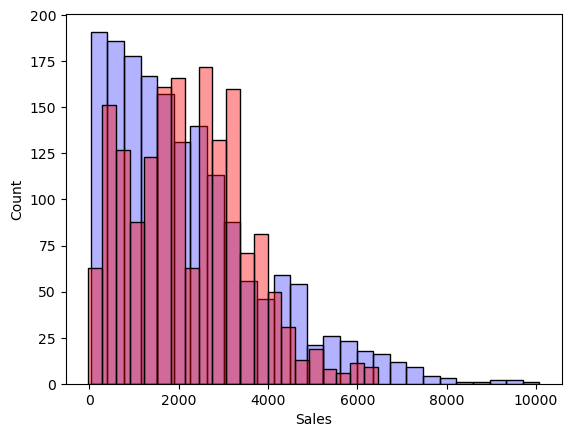

In [475]:
sns.histplot(y_valid, color='blue', alpha=0.3)
sns.histplot(y_valid_predict5, color='red', alpha=0.4)

#### XGBOOST

### Model 8

In [476]:
import xgboost as xg
xgbr = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
xgbr.fit(X_train_transformed,y_train)


C:\Users\nites\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [22:59:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [477]:
y_valid_predict6 = xgbr.predict(X_valid_transformed)
df6 = pd.DataFrame({'y_actual':y_valid,'y_predicted':y_valid_predict6})
df6

,y_actual,y_predicted
3454,4426.2384,3064.835938
3386,4845.0266,4037.567627
235,2293.0152,4946.721680
7201,1065.2800,1757.533081
7782,2345.6134,2731.176514
...,...,...
1994,3207.8244,2458.205078
6557,2263.7200,1397.516479
3875,1906.8512,2048.509766
7552,2773.0570,2584.015625


In [478]:
from sklearn import metrics

print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y_valid, y_valid_predict6))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_valid, y_valid_predict6)))
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_valid, y_valid_predict6))

Mean Squared Error(MSE):  1254304.875004374
Root Mean Squared Error(RMSE):  1119.9575326789734
Mean Absolute Error(MAE):  787.7753539181061


<Axes: xlabel='Sales', ylabel='Count'>

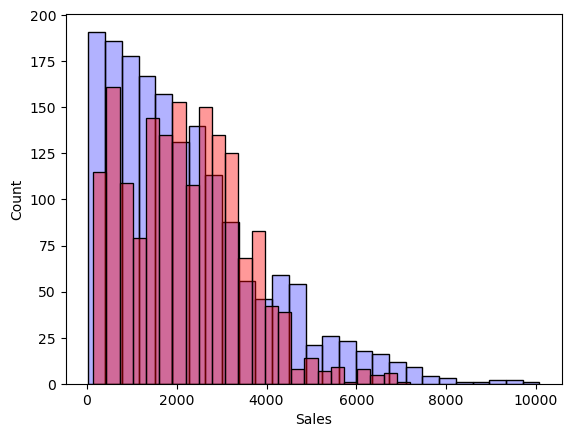

In [479]:
sns.histplot(y_valid, color='blue', alpha=0.3)
sns.histplot(y_valid_predict6, color='red', alpha=0.4)

In [480]:
import xgboost as xg
xgbr = xg.XGBRegressor(n_estimators = 11)
xgbr.fit(X_train_transformed,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=11, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [481]:
y_valid_predict7 = xgbr.predict(X_valid_transformed)
df7 = pd.DataFrame({'y_actual':y_valid,'y_predicted':y_valid_predict7})
df7

,y_actual,y_predicted
3454,4426.2384,2927.970703
3386,4845.0266,4088.298828
235,2293.0152,4938.399902
7201,1065.2800,1749.022095
7782,2345.6134,2798.202637
...,...,...
1994,3207.8244,2449.694092
6557,2263.7200,1389.005493
3875,1906.8512,2050.829834
7552,2773.0570,2575.504639


In [482]:
from sklearn import metrics

print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y_valid, y_valid_predict7))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_valid, y_valid_predict7)))
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_valid, y_valid_predict7))

Mean Squared Error(MSE):  1259780.7654498382
Root Mean Squared Error(RMSE):  1122.3995569536894
Mean Absolute Error(MAE):  788.5679180832741


<Axes: xlabel='Sales', ylabel='Count'>

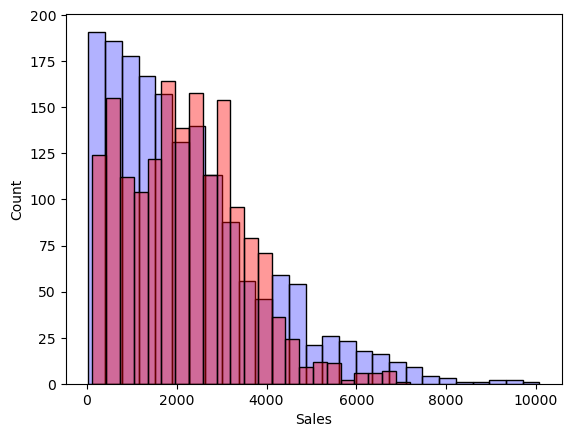

In [483]:
sns.histplot(y_valid, color='blue', alpha=0.3)
sns.histplot(y_valid_predict7, color='red', alpha=0.4)

- Model 1 -> Linear Regression is giving of MAE is 983.044
- Model 2 -> Lasso Regression is giving of MAE is 981.73
- Model 3 -> SVR Regression is giving of MAE is 1208.46
- Model 4 -> Random Forest is giving of MAE is 1208.46
- Model 5 -> Gradient Boosting Regressor of RMSE is 1108 and MAE is 782.41
- Model 6 -> Gradient Boosting Regressor of RMSE is 1108.5 and MAE is 782.33 with hyper parameter tuning
- Model 7 -> XGBoost is giving of MAE is 787.77
- Model 8 -> XGBoost is giving of MAE is 788.77 with hyper parameter tuning

In [489]:
X_final_train = pd.concat([X_train_transformed,X_valid_transformed],axis = 0)
y_final_train = pd.concat([y_train,y_valid],axis = 0)

### Final Model is Model 6 --> Gradient Boosting Regressor

********************************************************************************************************************************************************************************
# FINAL PREDICTIONS
*******************************************************************************************************************************************************************************

In [491]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth= 3,n_estimators=100)
gbr.fit(X_final_train,y_final_train)

GradientBoostingRegressor()

In [496]:
y_test_predict = gbr.predict(X_test_transformed)

In [506]:
test_DF = pd.DataFrame({'Sales':y_test_predict})

In [507]:
test_DF

,Sales
0,1672.515327
1,1417.918226
2,494.096609
3,2533.926708
4,5898.379371
...,...
5676,2174.172730
5677,2495.890540
5678,1859.009124
5679,3734.198533


********************************************************************************************************************************************************************************
# FINAL ANALYSIS
*******************************************************************************************************************************************************************************

In [508]:
Final_df = pd.concat([Bm_test_data,test_DF], axis =1)

In [509]:
Final_df.head()

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Price,Store_Id,Store_Est_Year,Store_Size,Store_Loc_Type,Store_Type,Sales
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1672.515327
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,1417.918226
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,494.096609
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,2533.926708
4,FDY38,12.857645,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5898.379371


# Comparing the TRAIN and TEST Data

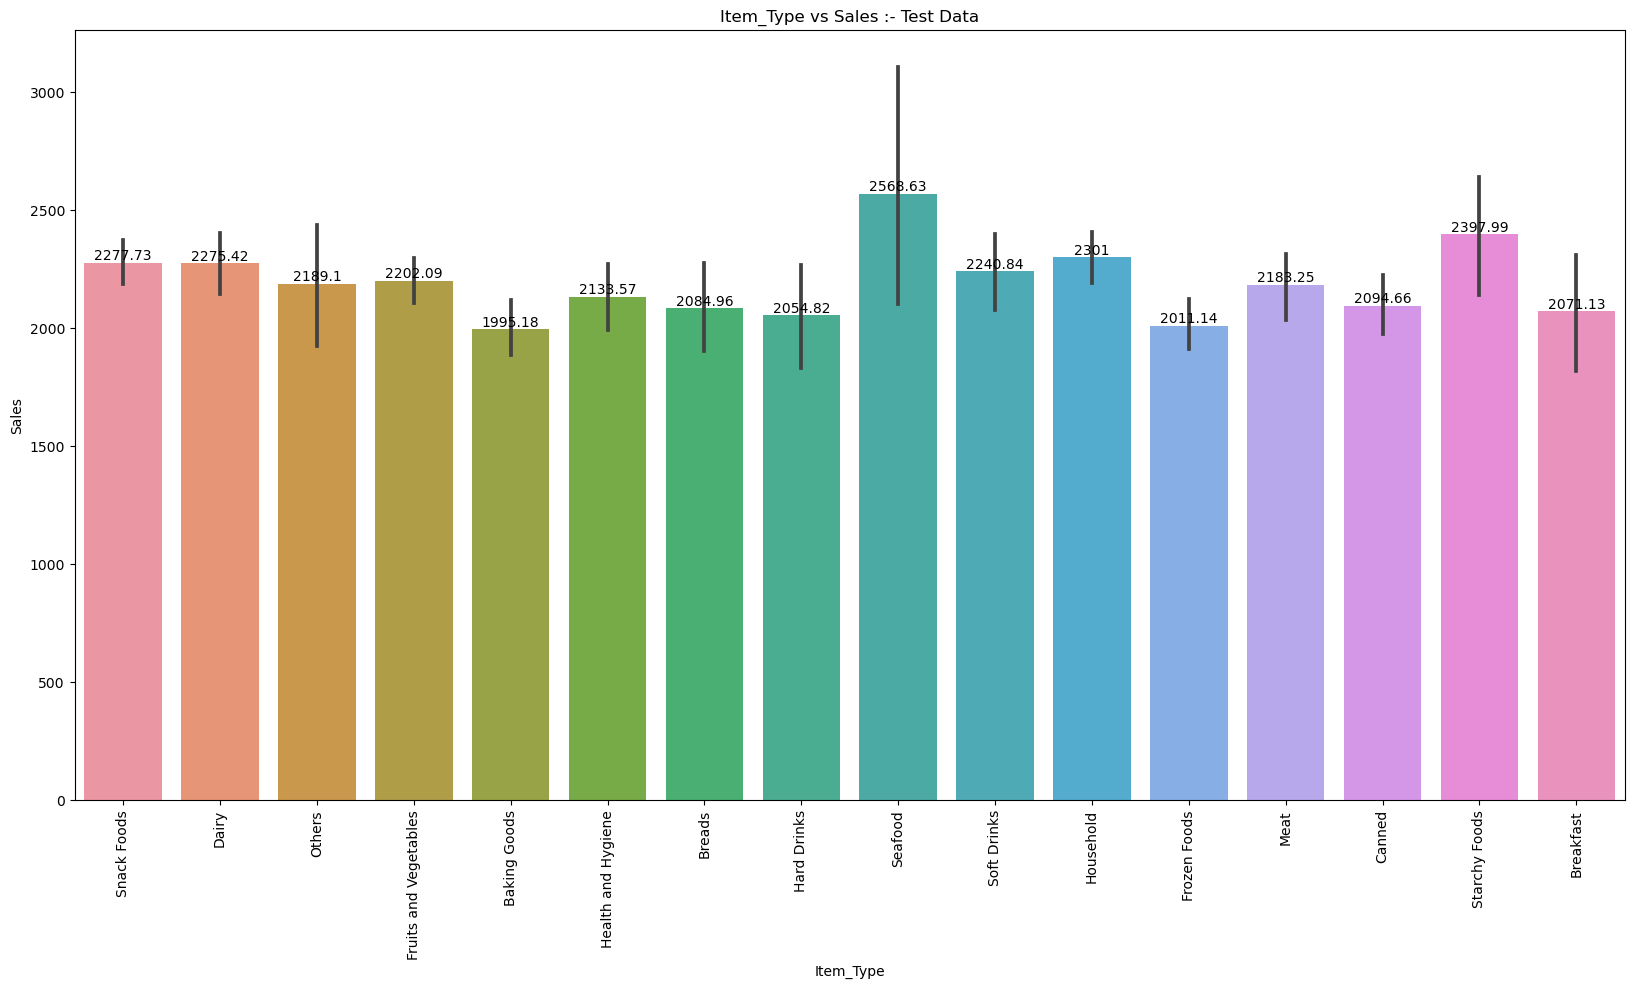

In [516]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'Item_Type',y = 'Sales', data = Final_df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 90)
plt.title('Item_Type vs Sales :- Test Data')
plt.show()


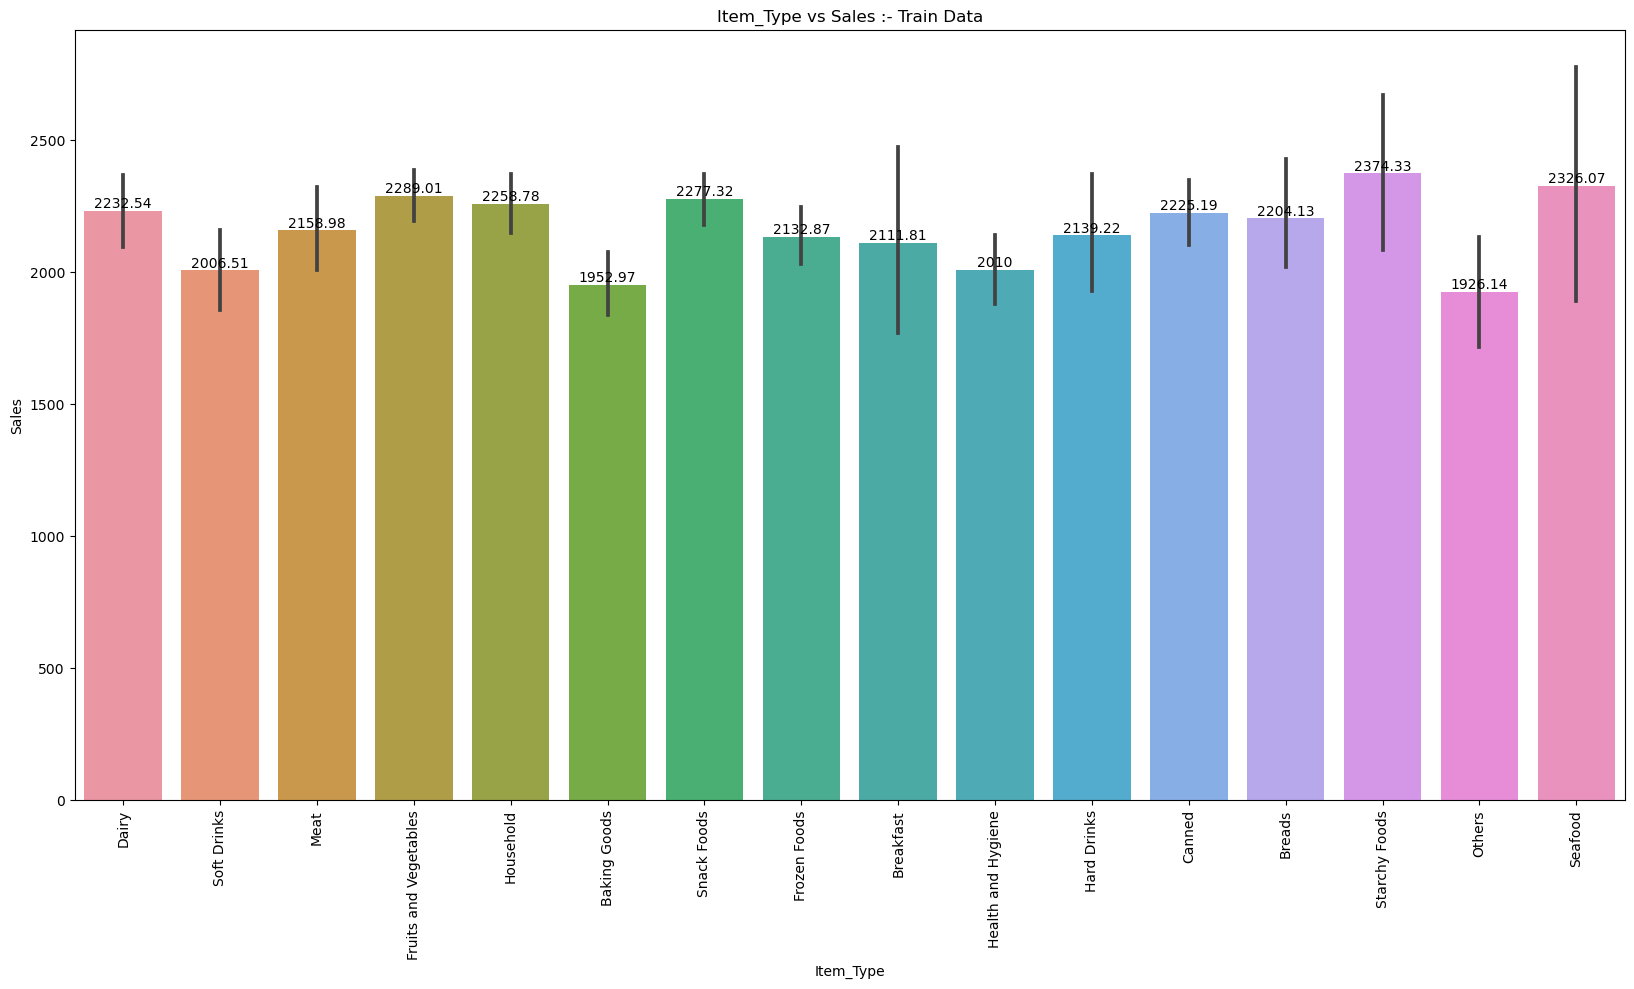

In [517]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x= 'Item_Type', y = 'Sales', data = Bm_data )
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 90)
plt.title('Item_Type vs Sales :- Train Data')
plt.show()

- Sales per the products are slightly increasing and few are sightly decreased.


# THANK YOU